In [1]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [2]:
# Please fill in your names here
NAME_STUDENT_1 = "Ylja Remmits"
NAME_STUDENT_2 = "Wout de Ruiter"

In [3]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

## MoneyBall (5 points, 1+2+1+1)
In the early 2000s, 2 baseball scouts completely changed the game of baseball by analysing the available data about baseball players and hiring the best ones.
The [MoneyBall dataset](https://www.openml.org/d/41021) contains this data (click the link for more details). The goal is to accurately predict the number of 'runs' each player can score. 

In [4]:
moneyball = oml.datasets.get_dataset(41021) # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
ballframe = pd.DataFrame(X, columns=attribute_names)
ballframe["target"] = y
ballframe.describe()

Team  League     Year       RA   ...           G    OOBP    OSLG  \
count  1232.00  1232.0  1232.00  1232.00   ...     1232.00  420.00  420.00   
mean     15.67     0.5  1988.96   715.08   ...        3.92    0.33    0.42   
std       9.72     0.5    14.82    93.08   ...        0.62    0.02    0.03   
min       0.00     0.0  1962.00   472.00   ...        0.00    0.29    0.35   
25%       7.00     0.0  1976.75   649.75   ...        4.00    0.32    0.40   
50%      16.00     0.5  1989.00   709.00   ...        4.00    0.33    0.42   
75%      23.00     1.0  2002.00   774.25   ...        4.00    0.34    0.44   
max      38.00     1.0  2012.00  1103.00   ...        7.00    0.38    0.50   

        target  
count  1232.00  
mean    715.08  
std      91.53  
min     463.00  
25%     652.00  
50%     711.00  
75%     775.00  
max    1009.00  

[8 rows x 15 columns]

1 . Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment?
- Feel free to create additional plots that help you understand the data
- Only visualize the data, you don't need to change it (yet)

Team           -0.11
League         -0.19
Year            0.42
RA              0.38
W               0.51
OBP             0.90
SLG             0.92
BA              0.83
Playoffs        0.39
RankSeason     -0.03
RankPlayoffs    0.21
G               0.08
OOBP            0.13
OSLG            0.19
target          1.00
Name: target, dtype: float64


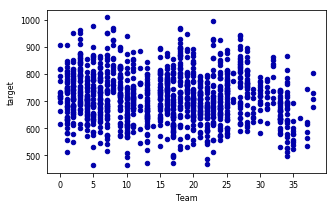

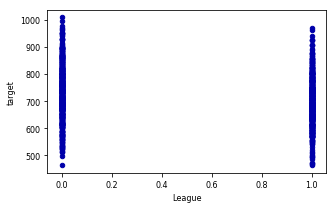

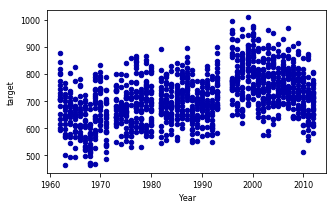

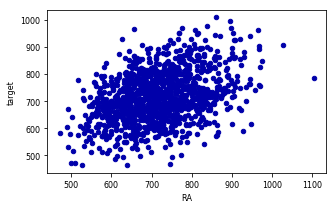

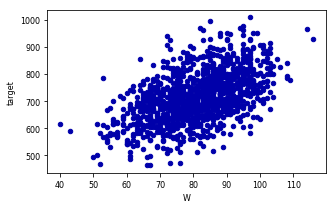

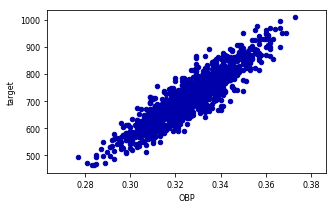

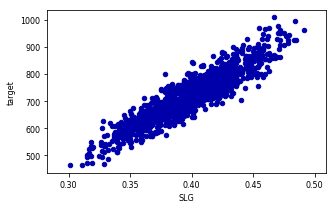

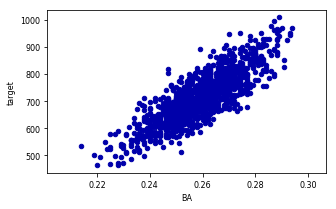

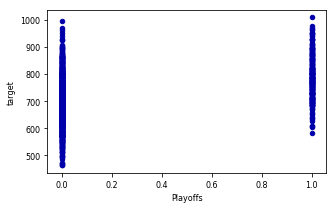

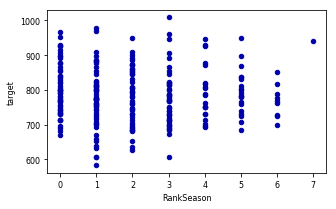

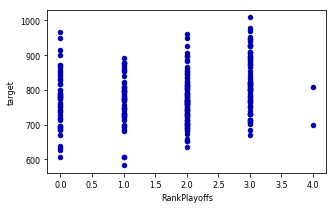

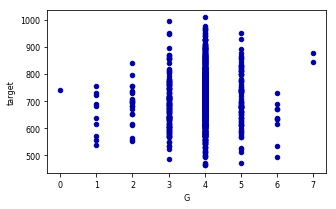

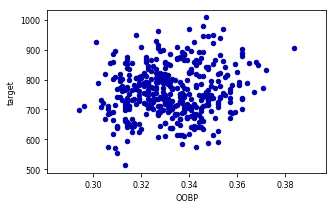

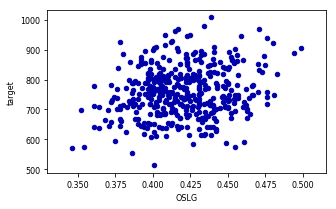

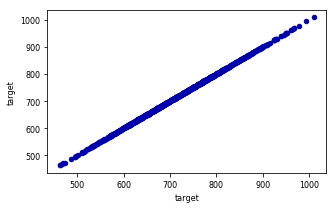

In [6]:
for feature in ballframe.columns:
    ballframe.plot(x=feature, y="target", kind="scatter")

print(ballframe.corr()["target"]);

2 . Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. Evaluate using cross-validation and the $R^2$ score, with the default parameters. Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.
- Preprocess the data as needed (e.g. are there nominal features that are not ordinal?). If you don't know how to proceed, remove the feature and continue.

In [11]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import ShuffleSplit


#define test methods and features
x_complete = ballframe[["OBP", "SLG", "BA"]];
testMethods = [["linear regression", linear_model.LinearRegression()],
               ["Ridge", Ridge()],
               ["lasso", Lasso()],
               ["nearest neighbours", KNeighborsRegressor()],
               ["Elastic Net", ElasticNet()]];

#define scaler
scaler = StandardScaler();
scaler.fit(x_complete);


#define datasets
x_train, x_test, y_train, y_test = train_test_split(x_complete, y, random_state=8967896);
x_transformed_train = scaler.transform(x_train);
x_transformed_test = scaler.transform(x_test);
x_transformed_complete = scaler.transform(x_complete);

datasets = [["normal training set", x_train, y_train], 
           ["transformed training set", x_transformed_train, y_train],
           ["normal test set", x_test, y_test, x_complete, y],
           ["transformed test set", x_transformed_test, y_test, x_transformed_complete, y]];


#do testing
for method in testMethods:
    print(method[0])
    method = method[1]
    for dataset in datasets:
        method.fit(dataset[1], dataset[2])
        print("dataset: "  + dataset[0] + "  - Score : {:.2f}".format(method.score(dataset[1], dataset[2])));
        
        if len(dataset)>3:
            scores = cross_val_score(method, dataset[3], dataset[4]);
            print("Cross-validation scores: {}".format(scores));
            
            shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10);
            scores = cross_val_score(method, dataset[3], dataset[4], cv=shuffle_split);
            print("Cross-validation scores:\n{}".format(scores));











StandardScaler(copy=True, with_mean=True, with_std=True)

linear regression


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

dataset: normal training set  - Score : 0.92


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

dataset: transformed training set  - Score : 0.92


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

dataset: normal test set  - Score : 0.94
Cross-validation scores: [0.887 0.901 0.913]
Cross-validation scores:
[0.921 0.933 0.924 0.928 0.918 0.92  0.926 0.928 0.92  0.922]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

dataset: transformed test set  - Score : 0.94
Cross-validation scores: [0.887 0.901 0.913]
Cross-validation scores:
[0.926 0.923 0.924 0.918 0.918 0.919 0.923 0.921 0.926 0.922]
Ridge


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

dataset: normal training set  - Score : 0.72


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

dataset: transformed training set  - Score : 0.92


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

dataset: normal test set  - Score : 0.47
Cross-validation scores: [0.543 0.682 0.482]
Cross-validation scores:
[0.633 0.623 0.627 0.626 0.613 0.649 0.625 0.63  0.627 0.634]


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

dataset: transformed test set  - Score : 0.94
Cross-validation scores: [0.887 0.901 0.913]
Cross-validation scores:
[0.919 0.919 0.927 0.93  0.925 0.924 0.919 0.924 0.925 0.925]
lasso


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

dataset: normal training set  - Score : 0.73


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

dataset: transformed training set  - Score : 0.92


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

dataset: normal test set  - Score : 0.75
Cross-validation scores: [0.63  0.713 0.564]
Cross-validation scores:
[0.743 0.732 0.725 0.719 0.743 0.723 0.738 0.728 0.755 0.738]


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

dataset: transformed test set  - Score : 0.94
Cross-validation scores: [0.895 0.9   0.915]
Cross-validation scores:
[0.924 0.927 0.92  0.925 0.929 0.93  0.928 0.921 0.919 0.929]
nearest neighbours


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

dataset: normal training set  - Score : 0.93


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

dataset: transformed training set  - Score : 0.93


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

dataset: normal test set  - Score : 0.95
Cross-validation scores: [0.871 0.878 0.87 ]
Cross-validation scores:
[0.905 0.908 0.91  0.914 0.898 0.914 0.901 0.899 0.91  0.906]


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

dataset: transformed test set  - Score : 0.95
Cross-validation scores: [0.882 0.875 0.865]
Cross-validation scores:
[0.899 0.902 0.909 0.905 0.911 0.899 0.904 0.909 0.906 0.906]
Elastic Net


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

dataset: normal training set  - Score : 0.00


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

dataset: transformed training set  - Score : 0.88


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

dataset: normal test set  - Score : 0.00
Cross-validation scores: [-0.595 -0.009 -0.798]
Cross-validation scores:
[ 0.002  0.003  0.004  0.002  0.004  0.     0.003  0.003  0.002 -0.002]


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

dataset: transformed test set  - Score : 0.90
Cross-validation scores: [0.834 0.856 0.845]
Cross-validation scores:
[0.881 0.882 0.879 0.881 0.873 0.879 0.874 0.883 0.877 0.876]


3 . Do a default, shuffled train-test split and optimize the linear models for the degree of regularization ($alpha$) and choice of penalty (L1/L2). For Ridge and  Lasso, plot a curve showing the effect of the training and test set performance ($R^2$) while increasing the degree of regularization for different penalties. For ElasticNet, plot a heatmap $alpha \times l1\_ratio \rightarrow R^2$ using test set performance.
Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? Can you get better results?
- Think about how you get the L1/L2 loss. This is not a hyperparameter in regression.
- We've seen how to generate such heatmaps in Lecture 3.

In [57]:


x_train, x_test, y_train, y_test = train_test_split(x_complete, y, random_state=1232156);
x_transformed_train = scaler.transform(x_train);
x_transformed_test = scaler.transform(x_test);
x_transformed_complete = scaler.transform(x_complete);

testMethods = [["Lasso", Lasso()], #L1 error
               ["Ridge", Ridge()], #L2 error               
               ["Elastic Net", ElasticNet()]]; #super combi deal

l1l2Coefficient = [[-1], [-1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]]

datasets = [["normal training set", x_train, y_train], 
           ["transformed training set", x_transformed_train, y_train],
           ["normal test set", x_test, y_test, x_complete, y],
           ["transformed test set", x_transformed_test, y_test, x_transformed_complete, y]];

alphas = np.logspace(0, 1, 20)/10
print (alphas)

#do testing
results = []
for i, method in enumerate(testMethods):
    print(method[0])
    method = method[1]
    resultsMethod = []
    coefficients = l1l2Coefficient[i]
    for a in alphas:
        score = []
        for coef in coefficients:
            if coef>=0: 
               method.set_params(l1_ratio=coef);
            
            method.set_params(alpha=a);
            method.fit(x_train, y_train);
            if coef>=0: 
                score.append(method.score(X=x_test, y=y_test));
                print(method.score(X=x_test, y=y_test))
            else:
                score = method.score(X=x_test, y=y_test);
        resultsMethod.append(score);
    results.append(resultsMethod);
    

[0.1   0.113 0.127 0.144 0.162 0.183 0.207 0.234 0.264 0.298 0.336 0.379
 0.428 0.483 0.546 0.616 0.695 0.785 0.886 1.   ]
Lasso


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Ridge


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Elastic Net


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.018590779532422164


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.021687448686525168


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.025643705223725832


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.030875095212129052


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.03811641141406441


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.04880105460073403


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.06614965849936372


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.09921294743645093


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.1868786014524414


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.9208175645912584


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.015600669449714942


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.018340830714859924


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0218441517256196


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0264810000968424


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.03290761439173484


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.04240779727964128


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.057878440058766516


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.08752046111369605


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.16715877899758325


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.9191172176260004


ElasticNet(alpha=0.1128837891684689, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.012938898413639155


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.01535991337744025


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.018457194746338113


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.022560073535895286


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.028253132752033894


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.03668288802369746


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.05044632879247779


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.07694368860146372


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.14898659784752755


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.9169156845697913


ElasticNet(alpha=0.12742749857031338, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.01057071259476794


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0127063689686846


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.015440144713767423


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.019064206253625815


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.024098000423107724


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.031562585070603166


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.04377863585087283


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.06739775631418454


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.13230825895112308


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.9140689237724757


ElasticNet(alpha=0.14384498882876628, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.008464758002764139


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.010345536657544119


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.012754276154612776


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.01594957214021353


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.020391841519773912


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.026987917312203735


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.037805094106771464


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.058799643780945154


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.11705712325550166


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.9103946312203697


ElasticNet(alpha=0.16237767391887217, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.00659280881140445


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.00824614837154225


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.010364559129291906


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.013176381302537399


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.01708867850640161


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.022904622378505657


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.03246011238898072


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0510692972952117


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.10315740528357786


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.9056598142239933


ElasticNet(alpha=0.18329807108324359, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.004929503313338857


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.006380057223531077


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.008239385159583446


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.010708614511180437


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.014146699558028721


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.019263004091923275


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.027682872152804294


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.04413042794499755


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0905273896642792


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.89956680023904


ElasticNet(alpha=0.20691380811147897, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.00345209117450973


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.004721973692689896


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.006350295064901701


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.00851374971165475


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.011528000762198731


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.01601773282325092


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.023417302738310553


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.03791104583032845


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.07908217486898239


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.8917353968491946


ElasticNet(alpha=0.23357214690901223, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.002140194405100937


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0032492131908156145


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.004671714102143065


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.006562488645629361


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.009198315357950682


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.013127607757261184


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.019611965830428346


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.03234377890460216


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.06873588550767973


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.8816801458010297


ElasticNet(alpha=0.26366508987303583, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0009755834922028361


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0019414574003151497


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0031806981856735694


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.004828489486181198


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.007126739320879926


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.01055529613461692


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.016219874511637755


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.027366020076835747


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.05940348509987925


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.868781323853076


ElasticNet(alpha=0.2976351441631318, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-5.8030601186587205e-05


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0007805308055924831


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0018566936875099584


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.003288109668789896


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.005285460225417649


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.00826706117973175


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.013198267562229749


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.022919940745727452


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.05100215149895215


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.852247973473753


ElasticNet(alpha=0.33598182862837817, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0009751884194411086


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.00024980689532227984


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0006813123267073173


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0019201617356795484


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0036494943884828324


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.006232487619385885


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.010508355497012789


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.018952403341622293


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.043452303415246085


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.8312026261132048


ElasticNet(alpha=0.37926901907322497, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0017888582318716926


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.001164052360730139


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0003618780993834836


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0007056839473782439


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0021964357607032747


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.00442421139325222


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.008115051250318639


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.015414800083808466


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.036678324095079096


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.8259377387360817


ElasticNet(alpha=0.42813323987193935, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0025105970214798212


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.001975134418333857


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.001287546955272445


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.00037227340043166635


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0009062188225202883


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0028176582951325857


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0059866954118357185


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.012262840232223349


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.030609033549405695


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.8194274315418955


ElasticNet(alpha=0.4832930238571752, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0031506969742467472


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0026945746649893465


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.002108778205638595


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0013288456305766694


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.00023910319260078694


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0013907948009044269


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.00409478342876346


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.009456303735193461


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.025177956838395632


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.8113557051472657


ElasticNet(alpha=0.5455594781168519, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.003718318319517966


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.003332633586905276


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0028372325713352797


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.002177535436072464


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0012555641363312109


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.00012389317654515342


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0024137001675064162


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.006958775386655014


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.020323430832278944


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.8013231861617753


ElasticNet(alpha=0.6158482110660264, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.004221609439186258


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.003898443053556244


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0034832951212198098


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0029303791802111068


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.002157474762675582


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0010006879373447575


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0009204656088077633


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.0047373703979111115


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.01598858628487798


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.7888246845257499


ElasticNet(alpha=0.6951927961775606, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.004667815190167346


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.004400126104432633


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.004056209143800338


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0035980984173913377


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0029575968260688867


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0019987069477378494


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.00040550582682241654


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.002762459621648339


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.012121236459507911


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.7732206501100862


ElasticNet(alpha=0.7847599703514611, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0050633743819501476


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.2, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.004844904973561492


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.3, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0045641972133656505


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.00419023745084024


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.00366730203208987


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.6, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.002884226725531791


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.7, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

-0.0015826308178719106


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.001007400485136145


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.9, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.008673698250844741


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

0.7537008623487064


ElasticNet(alpha=0.8858667904100825, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

-0.005414007327297687


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

-0.0052391982933504


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

-0.0050145703946233855


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

-0.004715287827560255


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

-0.0042967165932406015


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

-0.0036697863679084897


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

-0.0026273667957272817


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

-0.0005517220659418953


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.0056025669336539075


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

0.729238230577505


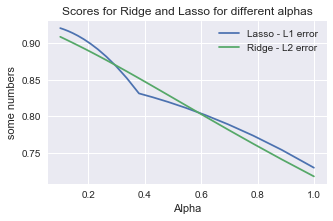

In [46]:
#graph of lasso en ridge
lassoResults = results[0]
ridgeResults = results[1];
import matplotlib.pyplot as plt
plt.plot(alphas, lassoResults);
plt.plot(alphas, ridgeResults);
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend(['Lasso - L1 error', 'Ridge - L2 error'], loc='upper right')
plt.title('Scores for Ridge and Lasso for different alphas')
plt.ylabel('some numbers');
plt.show();

(20, 10)


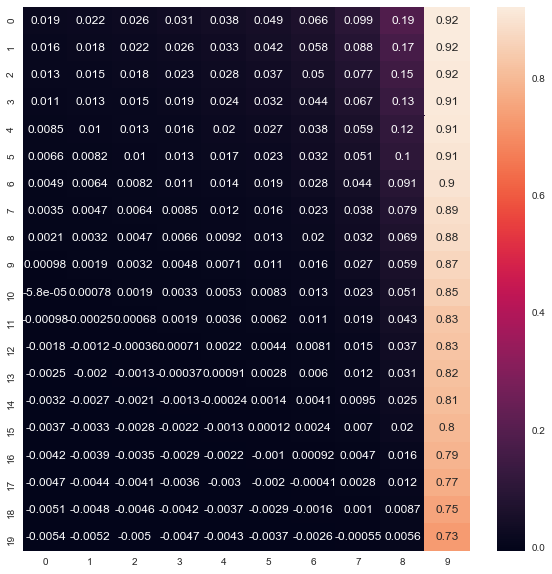

In [62]:
#Make the heatmap

import seaborn as sns; sns.set()
from matplotlib import pyplot
elasticNetResults = np.array(results[2])
print(elasticNetResults.shape)
fig, ax = pyplot.subplots(figsize=(10,10))
ax = sns.heatmap(elasticNetResults, annot=True)



4 . Visualize the coefficients of the optimized models. Do they agree on which features are
important? Compare the results with the feature importances returned by a RandomForest. Does it agree with the linear models? What would look for when scouting for a baseball player?

## Nepalese character recognition (5 points, 1+2+2)
The [Devnagari-Script dataset](https://www.openml.org/d/40923) contains 92,000 images (32x32 pixels) of 46 characters from Devanagari script. Your goal is to learn to recognize the right letter given the image.

In [63]:
devnagari = oml.datasets.get_dataset(40923) # Download Devnagari data
# Get the predictors X and the labels y
X, y = devnagari.get_data(target=devnagari.default_target_attribute); 
classes = devnagari.retrieve_class_labels(target_name='character') # This one takes a while, skip if not needed

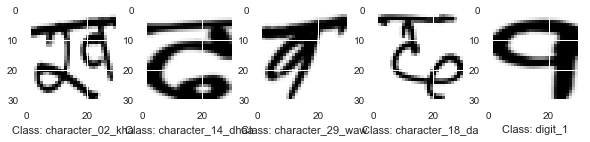

In [64]:
from random import randint
# Take some random examples, reshape to a 32x32 image and plot
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,90000)
    axes[i].imshow(X[n].reshape(32, 32), cmap=plt.cm.gray_r)
    axes[i].set_xlabel("Class: %s" % (classes[y[n]]))
plt.show();

1. Evaluate k-Nearest Neighbors, Logistic Regression and RandomForests with their default settings.
    - Take a stratified 10% subsample of the data.
    - Use the default train-test split and predictive accuracy. Is predictive accuracy a good scoring measure for this problem?
    - Try to build the same models on increasingly large samples of the dataset (e.g. 10%, 20%,...). Plot the training time and the predictive performance for each. Stop when the training time becomes prohibitively large (this will be different for different models). 

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

splits = StratifiedShuffleSplit(n_splits=10, ).split(X,y, y)
print(len(next(splits)[0]))
print(next(splits))

82800
(array([80113, 91082,  7561, ..., 64536, 37114, 10450], dtype=int64), array([47706, 50491, 71964, ..., 21803, 62894, 76041], dtype=int64))


2 . Optimize the value for the number of neighbors $k$ (keep $k$ < 50) and the number of trees (keep $n\_estimators$ < 100) on the stratified 10% subsample.
- Use 10-fold crossvalidation and plot $k$ and $n\_estimators$ against the predictive accuracy. Which value of $k$, $n\_estimators$ should you pick?

3 . For the RandomForest, optimize both $n\_estimators$ and $max\_features$ at the same time on the entire dataset.
- Use a nested cross-validation and a random search over the possible values, and measure the accuracy. Explore how fine-grained this random search can be, given your computational resources. What is the optimal performance you find?
- Hint: choose a nested cross-validation that is feasible. Don't use too many folds in the outer loop.
- Repeat the grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow ACC$ with ACC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

## 3. Understanding Ensembles (5 points (3+2))
Do a deeper analysis of how RandomForests and Gradient Boosting reduce their prediction error. We'll use the MAGIC telescope dataset (http://www.openml.org/d/1120). When high-energy particles hit the atmosphere, they produce chain reactions of other particles called 'showers', and you need to detect whether these are caused by gamma rays or cosmic rays.

In [4]:
# Get the data
magic_data = oml.datasets.get_dataset(1120) # Download MAGIC Telescope data
X, y = magic_data.get_data(target=magic_data.default_target_attribute);

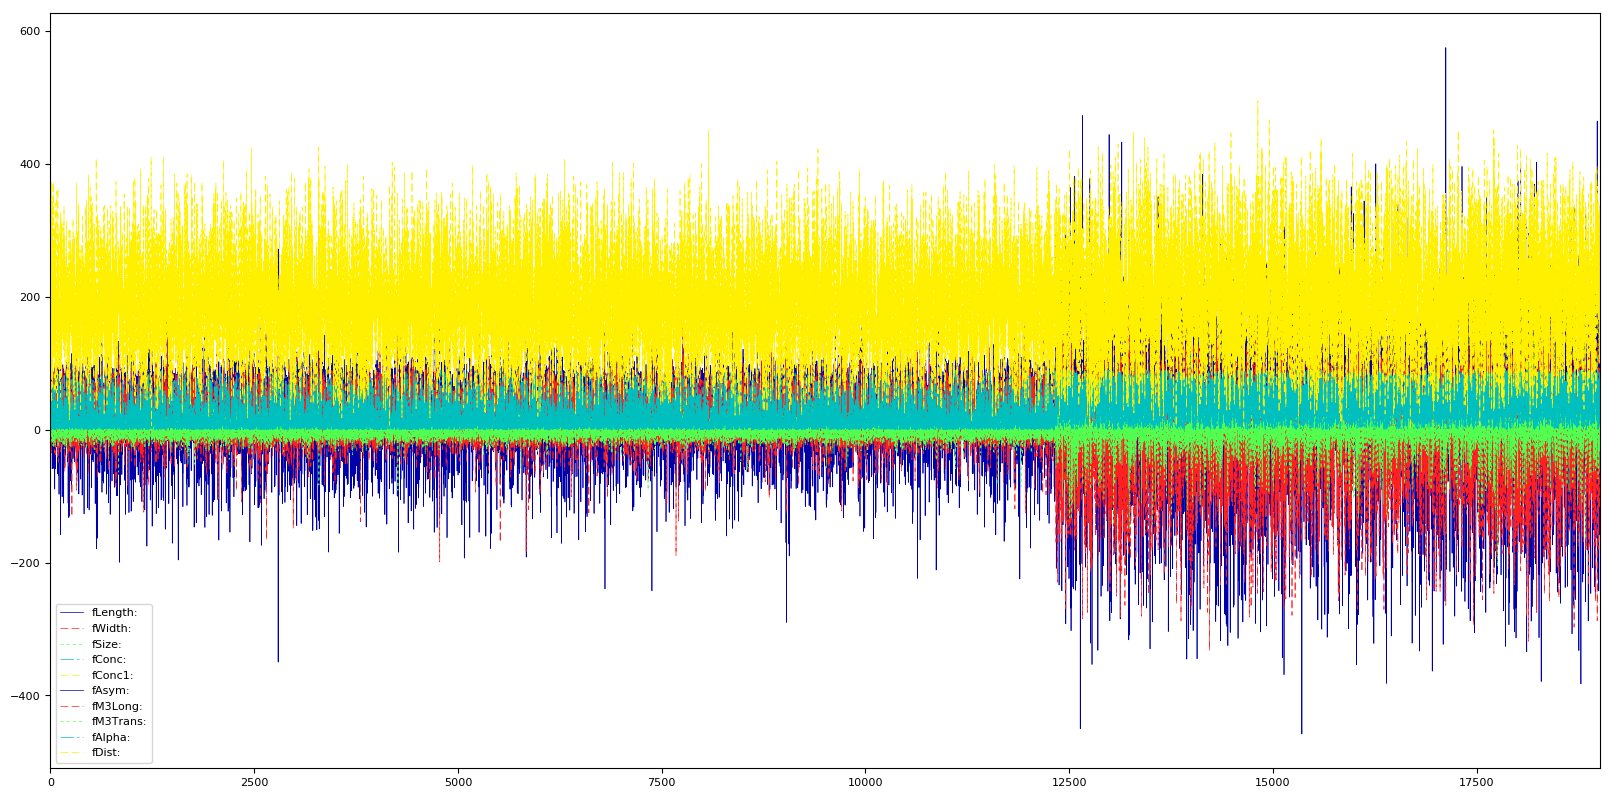

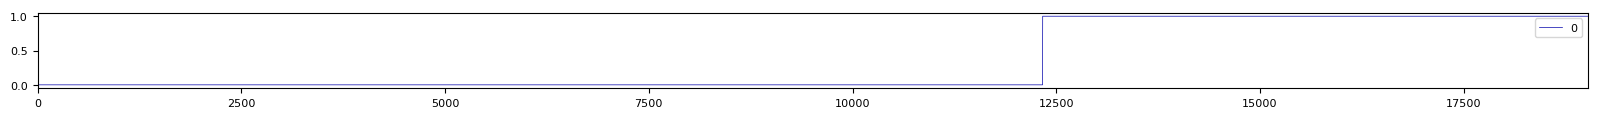

In [6]:
# Quick visualization
X, y, attribute_names = magic_data.get_data(target=magic_data.default_target_attribute, return_attribute_names=True)
magic = pd.DataFrame(X, columns=attribute_names)
magic.plot(figsize=(20,10))
# Also plot the target: 1 = gamma, 0 = background
pd.DataFrame(y).plot(figsize=(20,1));

1 . Do a bias-variance analysis of both algorithms. For each, vary the number of trees on a log scale from 1 to 1024, and plot the bias error (squared), variance, and total error (in one plot per algorithm). Interpret the results. Which error is highest for small ensembles, and which reduced most by each algorithm as you use a larger ensemble? When are both algorithms under- or overfitting? Provide a detailed explanation of why random forests and gradient boosting behave this way.
- See lecture 3 for an example on how to do the bias-variance decomposition
- To save time, you can use a 10% stratified subsample in your initial experiments, but show the plots for the full dataset in your report.

2 . A _validation curve_ can help you understand when a model starts under- or overfitting. It plots both training and test set error as you change certain characteristics of your model, e.g. one or more hyperparameters. Build validation curves for gradient boosting, evaluated using AUROC, by varying the number of iterations between 1 and 500. In addition, use at least two values for the learning rate (e.g. 0.1 and 1), and tree depth (e.g. 1 and 4). This will yield at least 4 curves. Interpret the results and provide a clear explanation for the results. When is the model over- or underfitting? Discuss the effect of the different combinations learning rate and tree depth and provide a clear explanation.
- While scikit-learn has a `validation_curve` function, we'll use a modified version (below) that provides a lot more detail and can be used to study more than one hyperparameter. You can use a default train-test split.

In [4]:
# Plots validation curves for every classifier in clfs. 
# Also indicates the optimal result by a vertical line
# Uses 1-AUROC, so lower is better
def validation_curve(clfs, X_test, y_test, X_train, y_train):
    for n,clf in enumerate(clfs):
        test_score = np.empty(len(clf.estimators_))
        train_score = np.empty(len(clf.estimators_))

        for i, pred in enumerate(clf.staged_decision_function(X_test)):
            test_score[i] = 1-roc_auc_score(y_test, pred)

        for i, pred in enumerate(clf.staged_decision_function(X_train)):
            train_score[i] = 1-roc_auc_score(y_train, pred)

        best_iter = np.argmin(test_score)
        learn = clf.get_params()['learning_rate']
        depth = clf.get_params()['max_depth']
        test_line = plt.plot(test_score,
                             label='learn=%.1f depth=%i (%.2f)'%(learn,depth,
                                                                 test_score[best_iter]))

        colour = test_line[-1].get_color()
        plt.plot(train_score, '--', color=colour)
        
        plt.xlabel("Number of boosting iterations")
        plt.ylabel("1 - area under ROC")
        plt.axvline(x=best_iter, color=colour)
        
    plt.legend(loc='best')